In [1]:
import torch
import torch.nn as nn
from torch.distributions.categorical import Categorical
from torch.optim import Adam
import numpy as np
import gym
from gym.spaces import Discrete, Box
import matplotlib.pyplot as plt
import time
from agent import *
plt.style.use('seaborn')

In [2]:
def plot_agent_reward(r,eps,discount,lr_):
    fig, ax = plt.subplots(1,figsize=(14,10))
    ax.set_title(f"Agent Reward over {eps}eps with $\gamma$={discount} and a learning rate:{lr_}", fontsize=20)
    ax.set_xlabel("Number of Episodes",fontsize = 14)
    ax.set_ylabel("Episode Reward",fontsize = 14)
    ax.plot(r, label = 'Agent\'s reward')
    ax.plot([np.mean(r[i:i+50]) for i in range(eps - 50)], ls='--', lw=2,color='red',label = '50eps moving average')
    ax.legend(fontsize = 14)
    plt.show()

In [3]:
env = gym.make('LunarLander-v2')
input_dim = env.observation_space.shape[0]
output_dim = env.action_space.n

# 1. Monte-Carlo Lunar Lander 

Episode 0 Score: -394.3921330209564
Episode 100 Score: -83.98087431389928
Episode 200 Score: -139.85499174557305
Episode 300 Score: -181.1979279329684
Episode 400 Score: -134.41407609718613
Episode 500 Score: -272.4025539902154
Episode 600 Score: -149.44632959140418
Episode 700 Score: -217.4274075707138
Episode 800 Score: -51.76675204685622
Episode 900 Score: -128.32424944970114
Episode 1000 Score: -120.93439607918343
Episode 1100 Score: -185.96360393094432
Episode 1200 Score: -95.86234603851457
Episode 1300 Score: -91.44689654413152
Episode 1400 Score: -122.74302731308987
Episode 1500 Score: -119.46974053790777
Episode 1600 Score: -99.37115287858691
Episode 1700 Score: -93.92573545322374
Episode 1800 Score: -112.02095939505824
Episode 1900 Score: -55.7748090272253
Episode 2000 Score: -86.7198930506366
Episode 2100 Score: -46.423300201818506
Episode 2200 Score: -29.543953817254874
Episode 2300 Score: 14.811515127309606
Episode 2400 Score: -0.14291422974667967


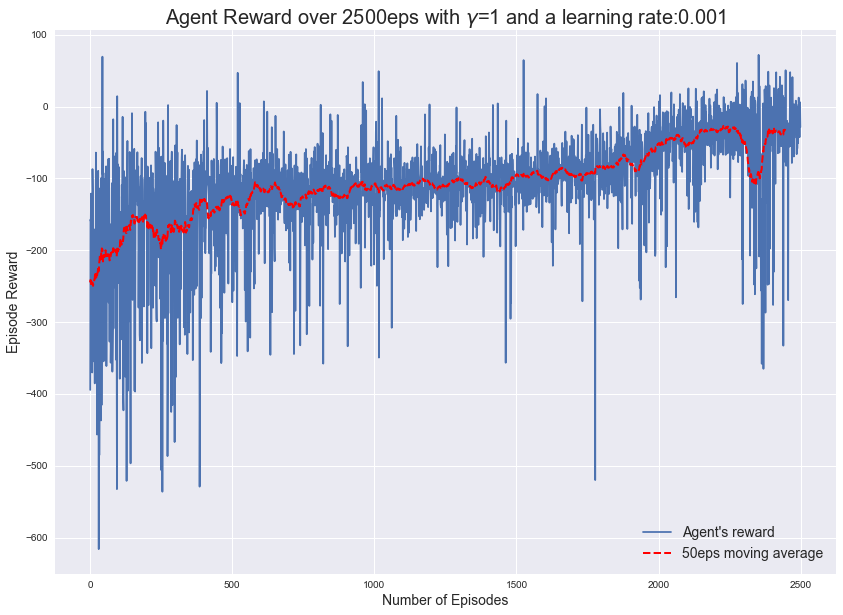

Total Run Time is 546.42s


In [4]:
eps = 2500
discount = 1
lr_ = 0.001
t1 = time.time()
r = train(eps,discount,lr_, input_dim, output_dim, env, MC = True)
plot_agent_reward(r,eps,discount,lr_)
print("Total Run Time is {:.2f}s".format(time.time()-t1))

Episode 0 Score: -328.56793704222275
Episode 100 Score: -211.8666953294618
Episode 200 Score: -22.890417092349736
Episode 300 Score: -28.459150457714998
Episode 400 Score: -12.723863368669655
Episode 500 Score: 100.82567423892118
Episode 600 Score: 131.1665574852071
Episode 700 Score: -27.938426755407555
Episode 800 Score: -52.29529975244026
Episode 900 Score: -82.79537785241158
Episode 1000 Score: -60.74789864497558
Episode 1100 Score: -80.55215966788987
Episode 1200 Score: -58.04787694460093
Episode 1300 Score: -63.46040575292439
Episode 1400 Score: -4.701920091454127
Episode 1500 Score: -36.22193126092591
Episode 1600 Score: -60.235283944587934
Episode 1700 Score: -67.44217244790023
Episode 1800 Score: -63.68281798200562
Episode 1900 Score: -88.14315638789887
Episode 2000 Score: -50.87778744133258
Episode 2100 Score: -31.81893199885192
Episode 2200 Score: -81.62883993712819
Episode 2300 Score: -63.89889000464497
Episode 2400 Score: -82.73657503324742


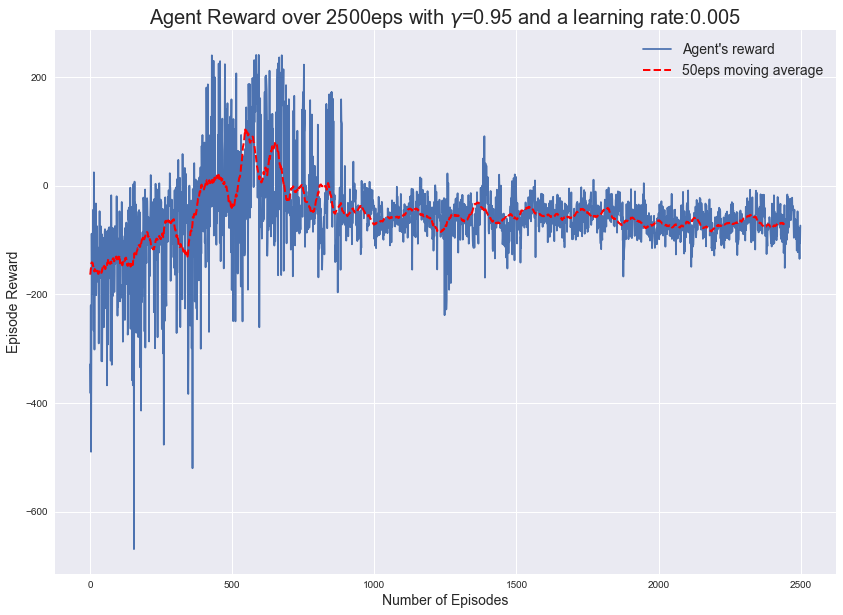

Total Run Time is 6959.56s


In [5]:
eps = 2500
discount =  0.95
lr_ = 0.005
t1 = time.time()
r = train(eps,discount,lr_, input_dim, output_dim, env, MC = True)
plot_agent_reward(r,eps,discount,lr_)
print("Total Run Time is {:.2f}s".format(time.time()-t1))

Episode 0 Score: -352.5681977427155
Episode 100 Score: -233.7010623805798
Episode 200 Score: -10.942884867612477
Episode 300 Score: 105.76123292808181
Episode 400 Score: -124.74542261095075
Episode 500 Score: 1.832186506466634
Episode 600 Score: -44.5973756949346
Episode 700 Score: 47.085981929831554
Episode 800 Score: -34.0829566383784
Episode 900 Score: -85.15709614493096
Episode 1000 Score: -54.83271899131819
Episode 1100 Score: -92.01686539860188
Episode 1200 Score: -196.8839170794742
Episode 1300 Score: -58.877851491982895
Episode 1400 Score: -57.64997860977561
Episode 1500 Score: -21.978919619627852
Episode 1600 Score: -30.655374224523797
Episode 1700 Score: -54.45120535521068
Episode 1800 Score: -72.66442902444447
Episode 1900 Score: -104.9041430932883
Episode 2000 Score: -89.05868630177994
Episode 2100 Score: -59.82051970594728
Episode 2200 Score: -118.01509748411685
Episode 2300 Score: -132.59744812462435
Episode 2400 Score: -86.01618923032719


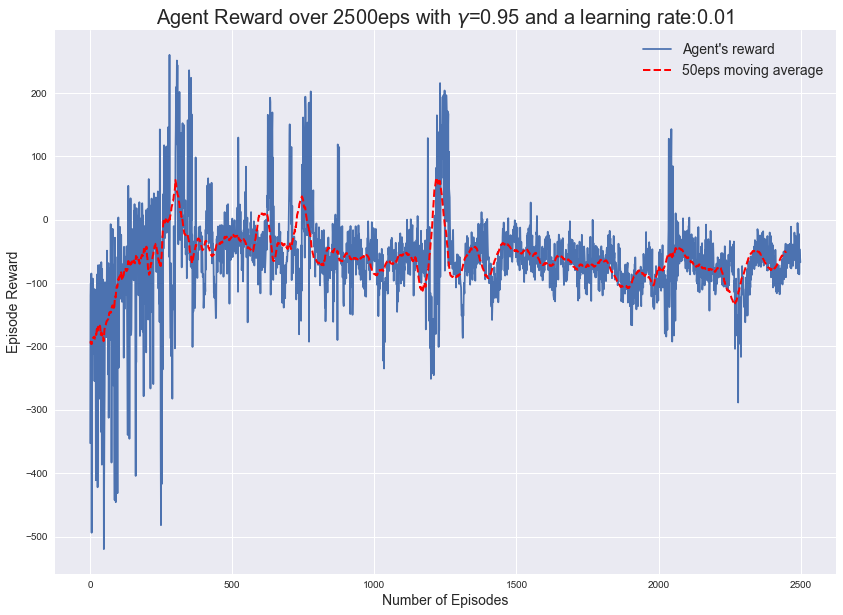

Total Run Time is 6232.19s


In [6]:
eps = 2500
discount =  0.95
lr_ = 0.01
t1 = time.time()
r = train(eps,discount,lr_, input_dim, output_dim, env, MC = True)
plot_agent_reward(r,eps,discount,lr_)
print("Total Run Time is {:.2f}s".format(time.time()-t1))

# 2. TD Lunar Lander

Episode 0 Score: -140.84983085975307
Episode 100 Score: -237.22859253755468
Episode 200 Score: -324.51070520004293
Episode 300 Score: -323.8527788285382
Episode 400 Score: -522.407527862342
Episode 500 Score: -392.8930037359901
Episode 600 Score: -308.7192949470118
Episode 700 Score: -225.80343575333666
Episode 800 Score: -20.20760973000403
Episode 900 Score: -243.08665615459597
Episode 1000 Score: -98.14468713148682
Episode 1100 Score: -206.37977246572163
Episode 1200 Score: -202.13195842695495
Episode 1300 Score: -85.92518743037066
Episode 1400 Score: -234.13443700666295
Episode 1500 Score: -168.4768280292079
Episode 1600 Score: -237.3292754062722
Episode 1700 Score: -79.80967654942971
Episode 1800 Score: -32.591387283039055
Episode 1900 Score: -210.59200705215727
Episode 2000 Score: -1.9090339397002225
Episode 2100 Score: 28.696873790368237
Episode 2200 Score: -173.2614576088796
Episode 2300 Score: -23.19058296865454
Episode 2400 Score: -188.62453401990416
Episode 2500 Score: -179.2

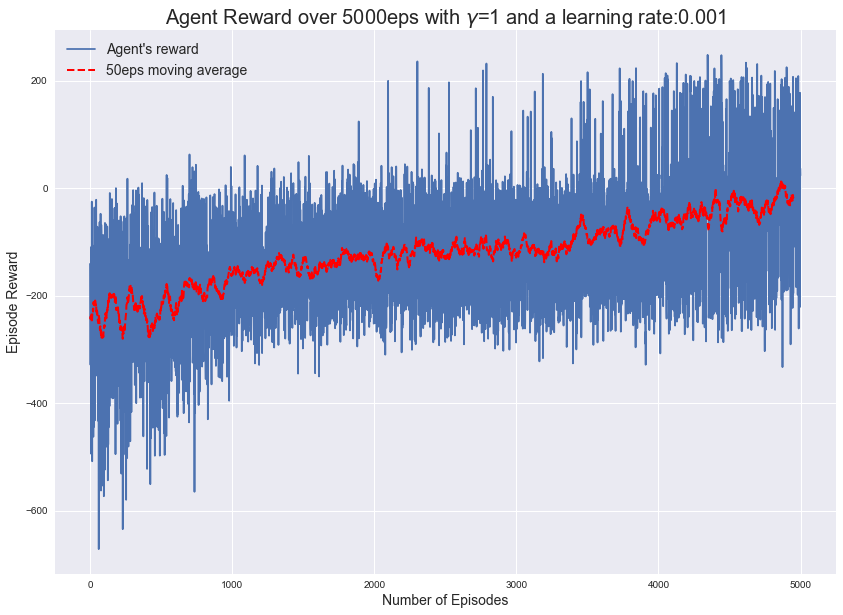

Total Run Time is 5771.90s


In [7]:
eps = 5000
discount = 1
lr_ = 0.001
t1 = time.time()
r = train(eps,discount,lr_, input_dim, output_dim, env, MC = False)
plot_agent_reward(r,eps,discount,lr_)
print("Total Run Time is {:.2f}s".format(time.time()-t1))

Episode 0 Score: -174.96070574768083
Episode 100 Score: -279.61172626513553
Episode 200 Score: -160.2467205050012
Episode 300 Score: -176.1041596948811
Episode 400 Score: -73.8394802161701
Episode 500 Score: -25.82905212165845
Episode 600 Score: 65.32519507091888
Episode 700 Score: -195.49421674693482
Episode 800 Score: -189.00309439978844
Episode 900 Score: -152.60460833460309
Episode 1000 Score: -58.01502063566661
Episode 1100 Score: -185.82219510693966
Episode 1200 Score: 1.8317905487778603
Episode 1300 Score: 202.13693589441996
Episode 1400 Score: 54.70053895580205
Episode 1500 Score: 231.277730959862
Episode 1600 Score: -0.41235823618672995
Episode 1700 Score: -195.28045198615732
Episode 1800 Score: 136.344977389424
Episode 1900 Score: -85.16981873239081
Episode 2000 Score: 95.80369378867707
Episode 2100 Score: 164.3947173177811
Episode 2200 Score: 215.05151351248452
Episode 2300 Score: -156.5644238171507
Episode 2400 Score: 3.619279366548362
Episode 2500 Score: -60.95161568731665

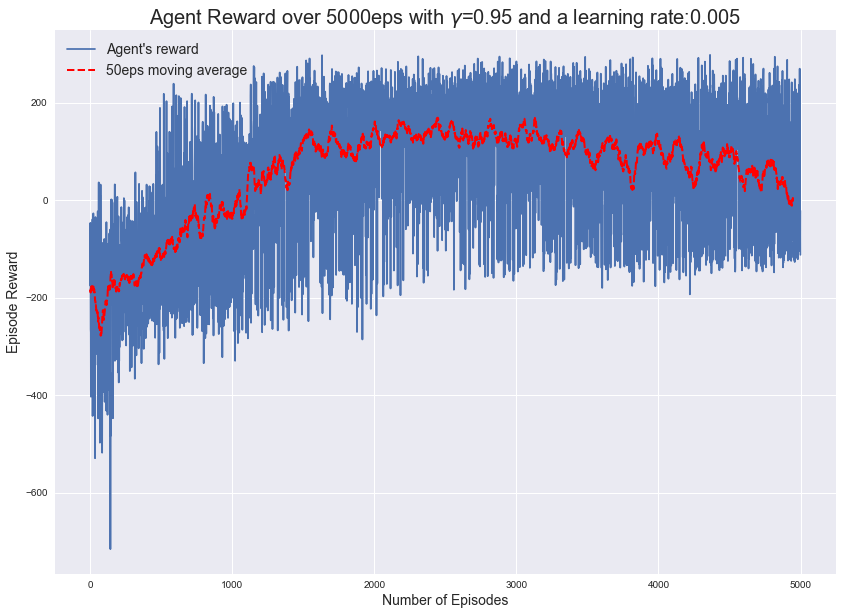

Total Run Time is 8260.63s


In [8]:
eps = 5000
discount =  0.95
lr_ = 0.005
t1 = time.time()
r = train(eps,discount,lr_, input_dim, output_dim, env, MC = False)
plot_agent_reward(r,eps,discount,lr_)
print("Total Run Time is {:.2f}s".format(time.time()-t1))

Episode 0 Score: -65.44208455590385
Episode 100 Score: -134.82391920676326
Episode 200 Score: -245.31087576871866
Episode 300 Score: -25.027982037700394
Episode 400 Score: 117.51327735302397
Episode 500 Score: 231.00235715503715
Episode 600 Score: -4.702840580712802
Episode 700 Score: 85.16068916805807
Episode 800 Score: 125.0573022192674
Episode 900 Score: 87.36007991917388
Episode 1000 Score: 17.17566878613498
Episode 1100 Score: 187.854662861656
Episode 1200 Score: 170.94539429909443
Episode 1300 Score: 248.5420841817094
Episode 1400 Score: 261.232971719929
Episode 1500 Score: -11.774844535468617
Episode 1600 Score: 196.0046034258675
Episode 1700 Score: 147.01818748468105
Episode 1800 Score: 163.33387850622182
Episode 1900 Score: 169.6087857925659
Episode 2000 Score: 0.6138086581293862
Episode 2100 Score: 0.10445958415117218
Episode 2200 Score: 228.63407700680978
Episode 2300 Score: 153.33016341879085
Episode 2400 Score: -150.7430949121127
Episode 2500 Score: 233.98142278221144
Epis

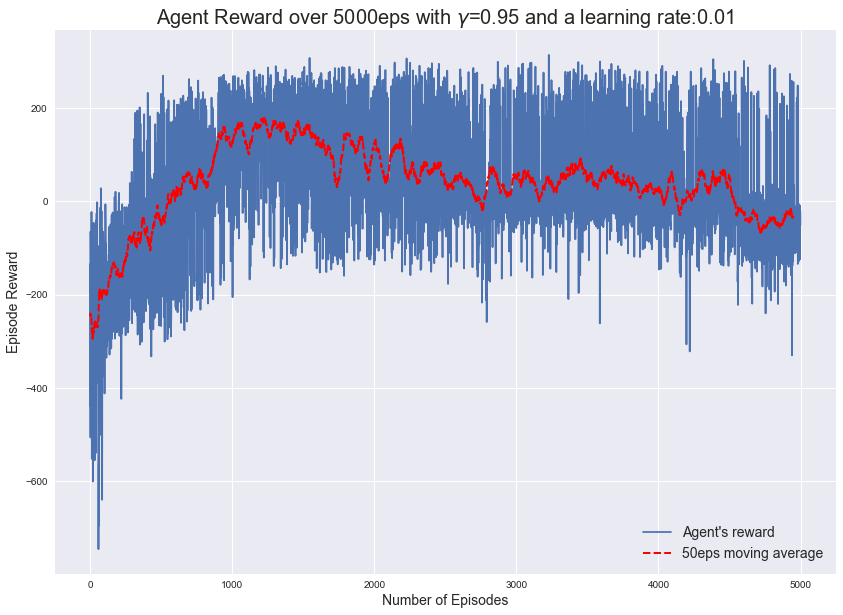

Total Run Time is 9519.10s


In [9]:
eps = 5000
discount =  0.95
lr_ = 0.01
t1 = time.time()
r = train(eps,discount,lr_, input_dim, output_dim, env, MC = False)
plot_agent_reward(r,eps,discount,lr_)
print("Total Run Time is {:.2f}s".format(time.time()-t1))